## Part (a) &mdash; Attenuation curves

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sedpy import attenuation
import fsps

In [2]:
# vector of wavelengths, in angstroms
lambdas = np.linspace(1000,10000,5000)

In [3]:
# attenuation curves
powerlaw = attenuation.powerlaw(lambdas)
calzetti = attenuation.calzetti(lambdas)
cardelli = attenuation.cardelli(lambdas)
lmc = attenuation.lmc(lambdas)
smc = attenuation.smc(lambdas)

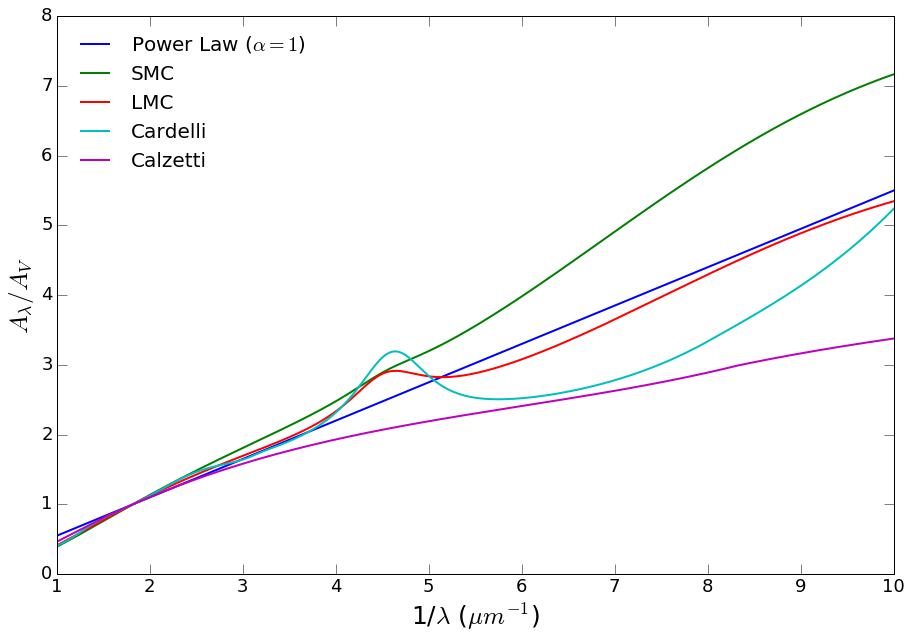

In [13]:
### plotting
fig = plt.figure(figsize=(15,10),dpi=300)
plt.plot(10**4/lambdas, powerlaw, lw=2, label=r'Power Law ($\alpha=1$)')
plt.plot(10**4/lambdas, smc, lw=2, label='SMC')
plt.plot(10**4/lambdas, lmc, lw=2, label='LMC')
plt.plot(10**4/lambdas, cardelli, lw=2, label='Cardelli')
plt.plot(10**4/lambdas, calzetti, lw=2, label='Calzetti')
plt.legend(loc=2,fontsize=20,frameon=False)
plt.xlabel(r'1/$\lambda$ ($\mu m^{-1}$)', fontsize=25)
plt.ylabel(r'$A_{\lambda}/A_V$', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=18, size=10)
plt.show()

Note: all attenuation curves are normalized to the attenuation at 5500 Angstroms.

## Part (b) &mdash; Filter transmission curves

In [14]:
fsps.find_filter('sdss')

['sdss_u', 'sdss_g', 'sdss_i', 'sdss_r', 'sdss_z']

In [15]:
fsps.find_filter('galex')

['galex_nuv', 'galex_fuv']

In [35]:
### filters here
u = fsps.get_filter('sdss_u').transmission
g = fsps.get_filter('sdss_g').transmission
r = fsps.get_filter('sdss_r').transmission
i = fsps.get_filter('sdss_i').transmission
z = fsps.get_filter('sdss_z').transmission
galex_fuv = fsps.get_filter('galex_fuv').transmission
galex_nuv = fsps.get_filter('galex_nuv').transmission

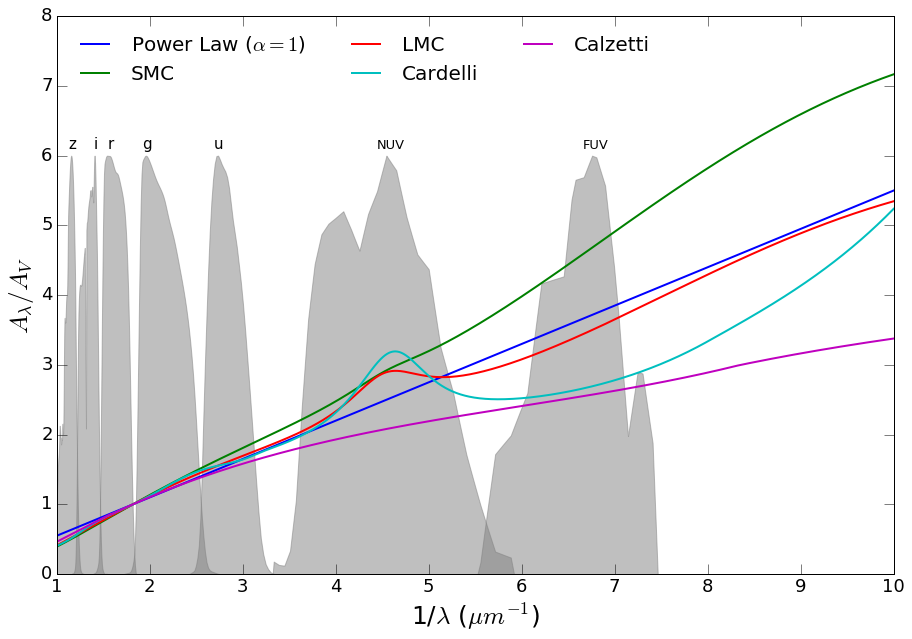

In [63]:
fig, ax = plt.subplots(figsize=(15,10),dpi=300)
### attenuation curves
ax.plot(10**4/lambdas, powerlaw, lw=2, label=r'Power Law ($\alpha=1$)')
ax.plot(10**4/lambdas, smc, lw=2, label='SMC')
ax.plot(10**4/lambdas, lmc, lw=2, label='LMC')
ax.plot(10**4/lambdas, cardelli, lw=2, label='Cardelli')
ax.plot(10**4/lambdas, calzetti, lw=2, label='Calzetti')
### transmission filters -- wavelength is in angstroms
ax.fill_between(10**4/u[0], 6*u[1]/np.max(u[1]), color='gray', alpha=0.5)#, label='u')
ax.fill_between(10**4/g[0], 6*g[1]/np.max(g[1]), color='gray', alpha=0.5)#, label='g')
ax.fill_between(10**4/r[0], 6*r[1]/np.max(r[1]), color='gray', alpha=0.5)#, label='r')
ax.fill_between(10**4/i[0], 6*i[1]/np.max(i[1]), color='gray', alpha=0.5)#, label='i')
ax.fill_between(10**4/z[0], 6*z[1]/np.max(z[1]), color='gray', alpha=0.5)#, label='z')
ax.fill_between(10**4/galex_fuv[0], 6*galex_fuv[1]/np.max(galex_fuv[1]),\
               color='gray', alpha=0.5)#, label='galex_fuv')
ax.fill_between(10**4/galex_nuv[0], 6*galex_nuv[1]/np.max(galex_nuv[1]), \
               color='gray', alpha=0.5)#, label='galex_nuv')
ax.text(10**4/u[0][np.where(u[1]==np.max(u[1]))[0]]-0.05,6.1,'u', fontsize=15)
ax.text(10**4/g[0][np.where(g[1]==np.max(g[1]))[0]]-0.04,6.1,'g', fontsize=15)
ax.text(10**4/r[0][np.where(r[1]==np.max(r[1]))[0]],6.1,'r', fontsize=15)
ax.text(10**4/i[0][np.where(i[1]==np.max(i[1]))[0]]-0.015,6.1,'i', fontsize=15)
ax.text(10**4/z[0][np.where(z[1]==np.max(z[1]))[0]]-0.03,6.1,'z', fontsize=15)
ax.text(10**4/galex_fuv[0][np.where(galex_fuv[1]==np.max(galex_fuv[1]))[0]]-0.1,6.1,'FUV',fontsize=13)
ax.text(10**4/galex_nuv[0][np.where(galex_nuv[1]==np.max(galex_nuv[1]))[0]]-0.1,6.1,'NUV',fontsize=13)
ax.legend(loc=2,fontsize=20,frameon=False,ncol=3)
ax.set_xlabel(r'1/$\lambda$ ($\mu m^{-1}$)', fontsize=25)
ax.set_ylabel(r'$A_{\lambda}/A_V$', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=18, size=10)
ax.set_xlim([1,10])
plt.show()

## Part (c) &mdash; Conroy extinction curve

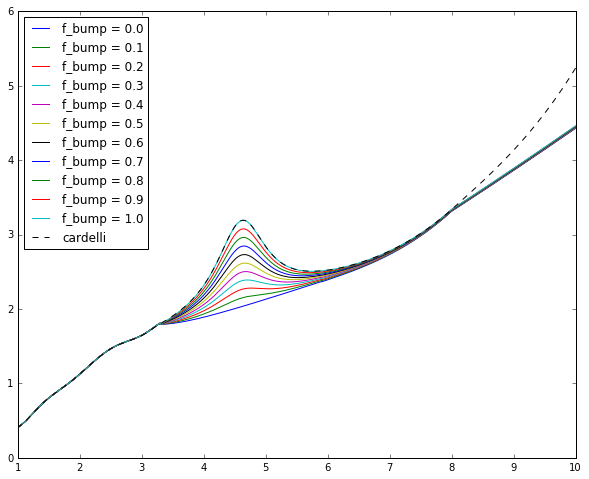

In [9]:
fig = plt.figure(figsize=(10,8))
fbumps = np.linspace(0,1,num=11)

for i in range(11):
    conroy = attenuation.conroy(lambdas, f_bump=fbumps[i])
    plt.plot(10**4/lambdas, conroy, label='f_bump = '+str(fbumps[i]))

plt.plot(10**4/lambdas, cardelli, label='cardelli', color='k', ls='--')
plt.legend(loc=2)
plt.show()

The Cardelli and Conroy curves are equal for a bump fraction of 1.0 and only for 1/$\lambda$ $\lesssim$ 8.2 or so.

## Part (d) &mdash; Constraining bump fraction

If we want to constrain the bump fraction, then we want filters that will transmit in the region of interest, roughly 3 to 6.5 microns$^{-1}$.

In [10]:
uv_filters = fsps.find_filter("uv")
uv_filters

['wfc3_uvis_f218w',
 'wfc3_uvis_f814w',
 'wfc3_uvis_f438w',
 'uvot_m2',
 'wfc3_uvis_f390w',
 'wfc3_uvis_f336w',
 'uvot_w2',
 'wfc3_uvis_f606w',
 'wfc3_uvis_f775w',
 'wfc3_uvis_f475w',
 'wfc3_uvis_f850lp',
 'wfc3_uvis_f225w',
 'galex_nuv',
 'galex_fuv',
 'uvot_w1',
 'wfc3_uvis_f555w',
 'wfc3_uvis_f275w']

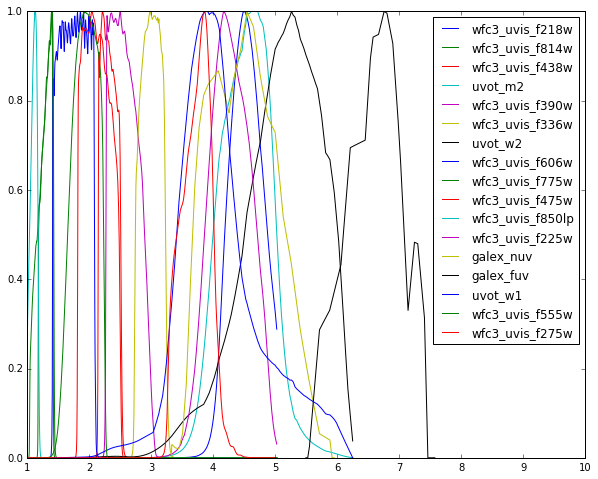

In [11]:
fig = plt.figure(figsize=(10,8))
for item in uv_filters:
    filt = fsps.get_filter(item)
    plt.plot(10**4/filt.transmission[0], filt.transmission[1]/max(filt.transmission[1]), label=item)

plt.xlim(1,10)    
plt.legend()
plt.show()